In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import upsetplot
from itertools import product

In [3]:
df = pd.read_csv("/home/unix/sjohri/valab_sjohri/projects/methods/hallmark.csv")

In [8]:
top_features = df.columns[:5]

upset_df = pd.DataFrame(list(product([True,False],repeat = len(top_features))),columns=top_features)
intersection = list()
for i in range(upset_df.shape[0]):
    sig_names = upset_df.columns[upset_df.iloc[i,]]
    temp = df[sig_names]
    list_sigs = [set(temp.iloc[:,i].dropna()) for i in range(temp.shape[1])]
    if len(list_sigs)!=0:
        intersection.append(len(set.intersection(*list_sigs)))
    else:
        intersection.append(0)
upset_df["Intersection"] = intersection
upset_df = upset_df.groupby(by = top_features.to_list()).first()
upset_df

Intersection
HALLMARK_TNFA_SIGNALING_VIA_NFKB HALLMARK_HYPOXIA HALLMARK_CHOLESTEROL_HOMEOSTASIS HALLMARK_MITOTIC_SPINDLE HALLMARK_WNT_BETA_CATENIN_SIGNALING              
False                            False            False                            False                    False                                           0
                                                                                                            True                                           42
                                                                                   True                     False                                         199
                                                                                                            True                                            0
                                                  True                             False                    False                                          74
                                                                                                            True                                            3
                                                                                   True                     False                                           0
                                                                                                            True                                            0
                                 True             False                            False                    False                                         200
                                                                                                            True                                            1
                                                                                   True                     False                                           1
                                                                                                            True                                            0
                                                  True                             False                    False                                           7
                                                                                                            True                                            0
                                                                                   True                     False                                           0
                                                                                                            True                                            0
True                             False            False                            False                    False                                         200
                                                                                                            True                                            2
                                                                                   True                     False                                           2
                                                                                                            True                                            0
                                                  True                             False                    False                                           6
                                                                                                            True                                            1
                                                                                   True                     False                                           0
                                                                                                            True                                            0
                                 True

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x2b737f24efd0>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x2b737f227970>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x2b7380a74280>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x2b7380ab3550>}

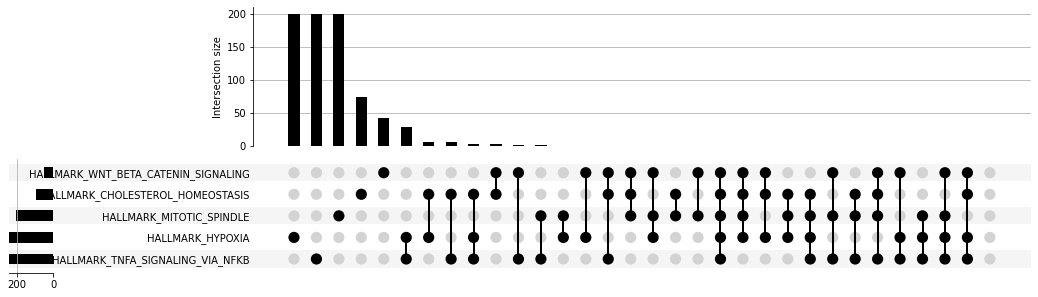

In [9]:
upsetplot.plot(upset_df['Intersection'], sort_by='cardinality')